# hyperopt

[hyperopt](http://hyperopt.github.io/hyperopt/) everybodys favorite hyperparameters tuning tool

In [3]:
import hyperopt.pyll.stochastic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ptitprince as pt
import seaborn as sns
from hyperopt import hp

In [4]:
def sample_my_space(sample_space: dict, num_of_samples: int = 1_000) -> None:
    return np.array(
        [
            hyperopt.pyll.stochastic.sample(sample_space).get(
                list(sample_space.keys())[0]
            )
            for _ in range(num_of_samples)
        ]
    )

## uniform


In [5]:
randint_sample_space = pd.DataFrame(
    sample_my_space({"hyper_1": hp.randint("hyper_1", 0, 10)}), columns=["randint"]
)

uniform_sample_space = pd.DataFrame(
    sample_my_space({"hyper_1": hp.uniform("hyper_1", 0, 10)}), columns=["uniform"]
)

quniform_sample_space = pd.DataFrame(
    sample_my_space({"hyper_1": hp.quniform("hyper_1", 0, 10, 3)}), columns=["quniform"]
)


df_uniform = pd.concat(
    [randint_sample_space, uniform_sample_space, quniform_sample_space], axis=1
).melt(var_name="distribution")
df_uniform.sample(6)

,distribution,value
2360,quniform,9.0
2513,quniform,9.0
296,randint,4.0
321,randint,0.0
362,randint,3.0
2364,quniform,6.0


<Axes: xlabel='value', ylabel='distribution'>

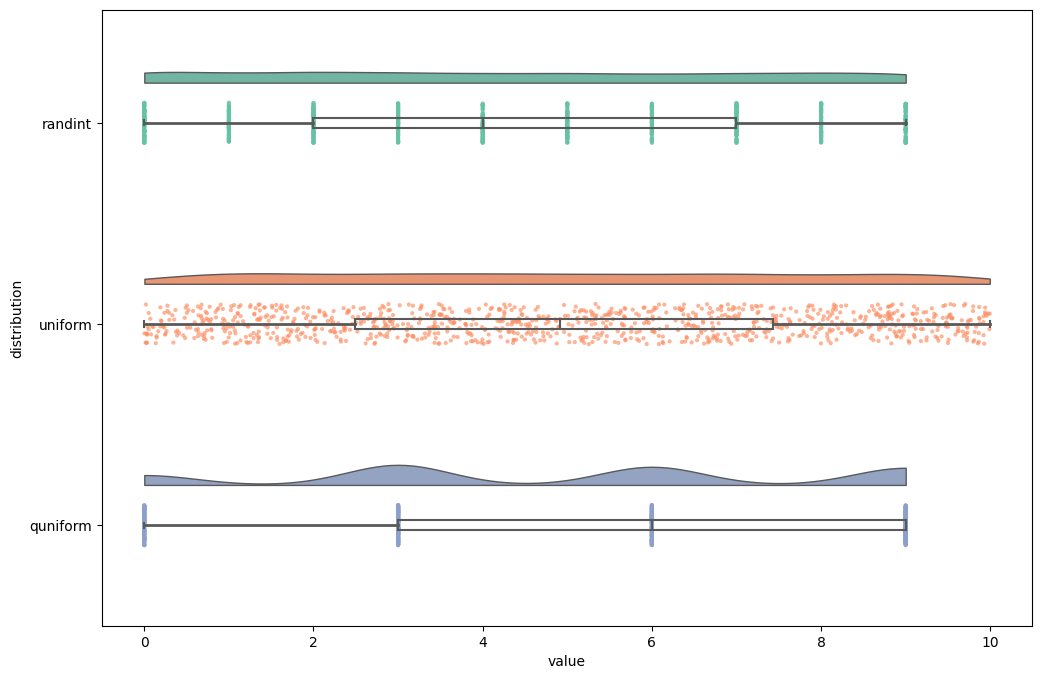

In [6]:
f, ax = plt.subplots(figsize=(12, 8))
pt.RainCloud(
    data=df_uniform,
    y="value",
    x="distribution",
    orient="h",
    width_viol=0.2,
    width_box=0.05,
    rain_alpha=0.66,
    rain_edgecolor="grey",
    ax=ax,
)

## normal 

In [7]:
# randint_sample_space = pd.DataFrame(
#     sample_my_space({"hyper_1": hp.randint("hyper_1", 0, 10)}), columns=["randint"]
# )

normal_sample_space = pd.DataFrame(
    sample_my_space({"hyper_1": hp.normal("hyper_1", 0, 10)}), columns=["normal"]
)
qnormal_sample_space = pd.DataFrame(
    sample_my_space({"hyper_1": hp.qnormal("hyper_1", 0, 10, 3)}), columns=["qnormal"]
)

df_normal = pd.concat([normal_sample_space, qnormal_sample_space], axis=1).melt(
    var_name="distribution"
)
df_normal.sample(6)

,distribution,value
988,normal,6.379286
790,normal,12.400179
933,normal,8.879761
1209,qnormal,9.000000
1968,qnormal,3.000000
352,normal,6.045364


<Axes: xlabel='value', ylabel='distribution'>

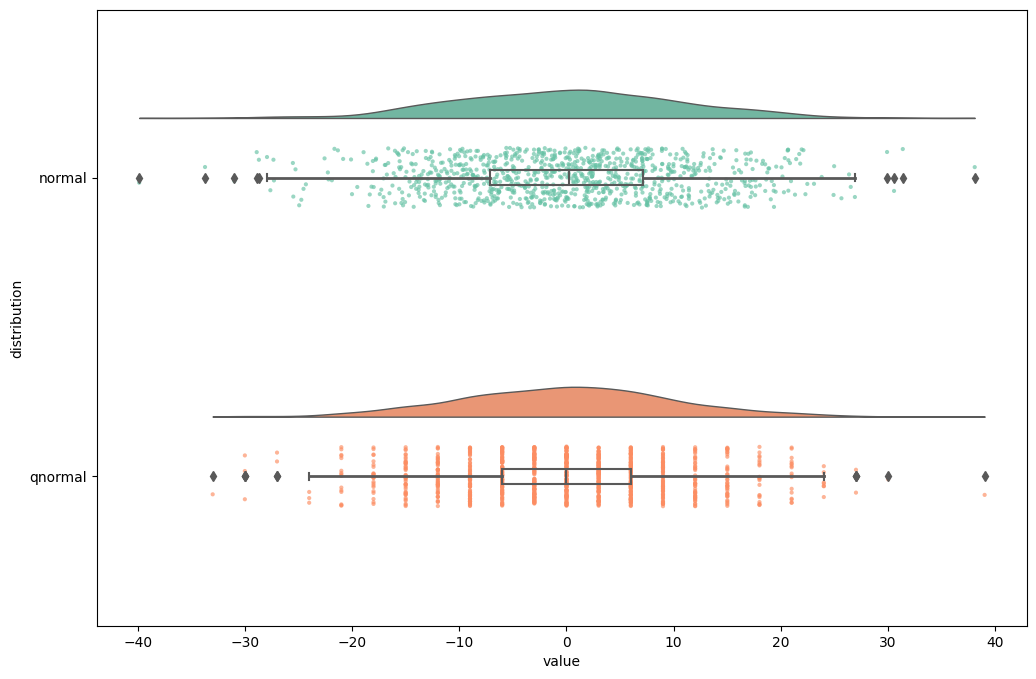

In [8]:
f, ax = plt.subplots(figsize=(12, 8))
pt.RainCloud(
    data=df_normal,
    y="value",
    x="distribution",
    orient="h",
    width_viol=0.2,
    width_box=0.05,
    rain_alpha=0.66,
    rain_edgecolor="grey",
    ax=ax,
)

## loguniform and lognormal


In [9]:
qloguniform_sample_space = pd.DataFrame(
    sample_my_space({"hyper_1": hp.qloguniform("hyper_1", 0, 10, 3)}),
    columns=["qloguniform"],
)
loguniform_sample_space = pd.DataFrame(
    sample_my_space({"hyper_1": hp.loguniform("hyper_1", 0, 10)}),
    columns=["loguniform"],
)


df_loguniform = pd.concat(
    [
        qloguniform_sample_space,
        loguniform_sample_space,
    ],
    axis=1,
).melt(var_name="distribution")
df_loguniform.sample(6)

,distribution,value
1265,loguniform,2.628422
1603,loguniform,5673.729480
883,qloguniform,357.000000
531,qloguniform,33.000000
1400,loguniform,70.212961
1061,loguniform,280.649356


<Axes: xlabel='value', ylabel='distribution'>

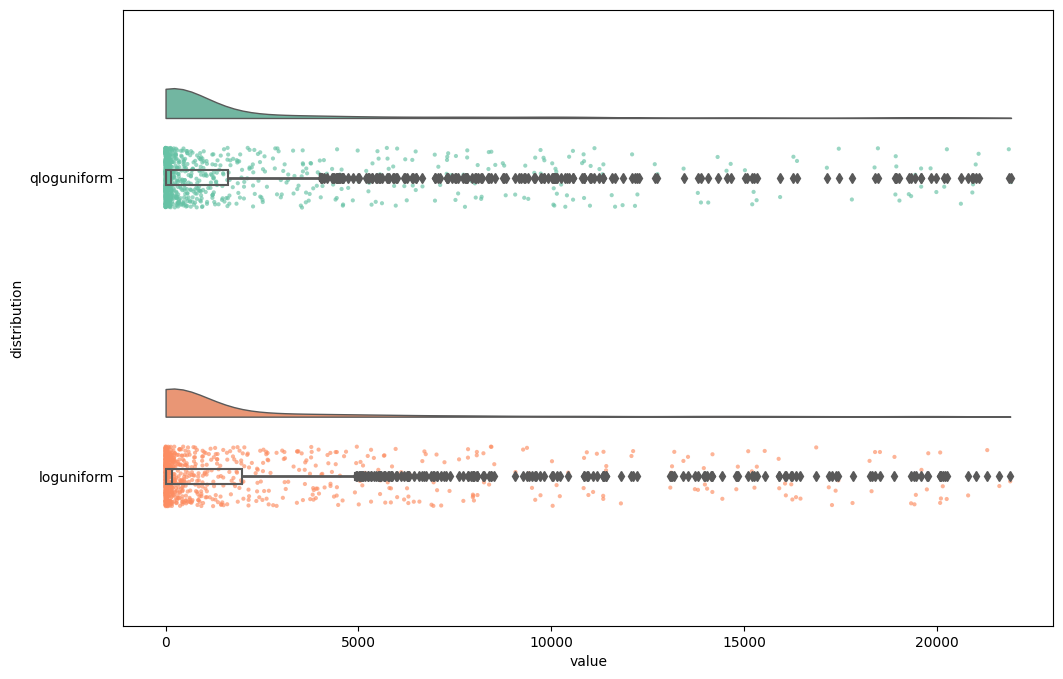

In [10]:
f, ax = plt.subplots(figsize=(12, 8))
pt.RainCloud(
    data=df_loguniform,
    y="value",
    x="distribution",
    orient="h",
    width_viol=0.2,
    width_box=0.05,
    rain_alpha=0.66,
    rain_edgecolor="grey",
    ax=ax,
)

In [11]:
lognormal_sample_space = pd.DataFrame(
    sample_my_space({"hyper_1": hp.lognormal("hyper_1", 0, 10)}), columns=["lognormal"]
)
qlognormal_sample_space = pd.DataFrame(
    sample_my_space({"hyper_1": hp.qlognormal("hyper_1", 0, 10, 3)}),
    columns=["qlognormal"],
)


df_lognormal = pd.concat(
    [
        lognormal_sample_space,
        qlognormal_sample_space,
    ],
    axis=1,
).melt(var_name="distribution")
df_lognormal.sample(6)

,distribution,value
331,lognormal,2.254194e+01
687,lognormal,6.579332e-04
355,lognormal,3.053200e-09
1588,qlognormal,3.000000e+00
1930,qlognormal,2.940000e+02
1693,qlognormal,1.200000e+01


<Axes: xlabel='value', ylabel='distribution'>

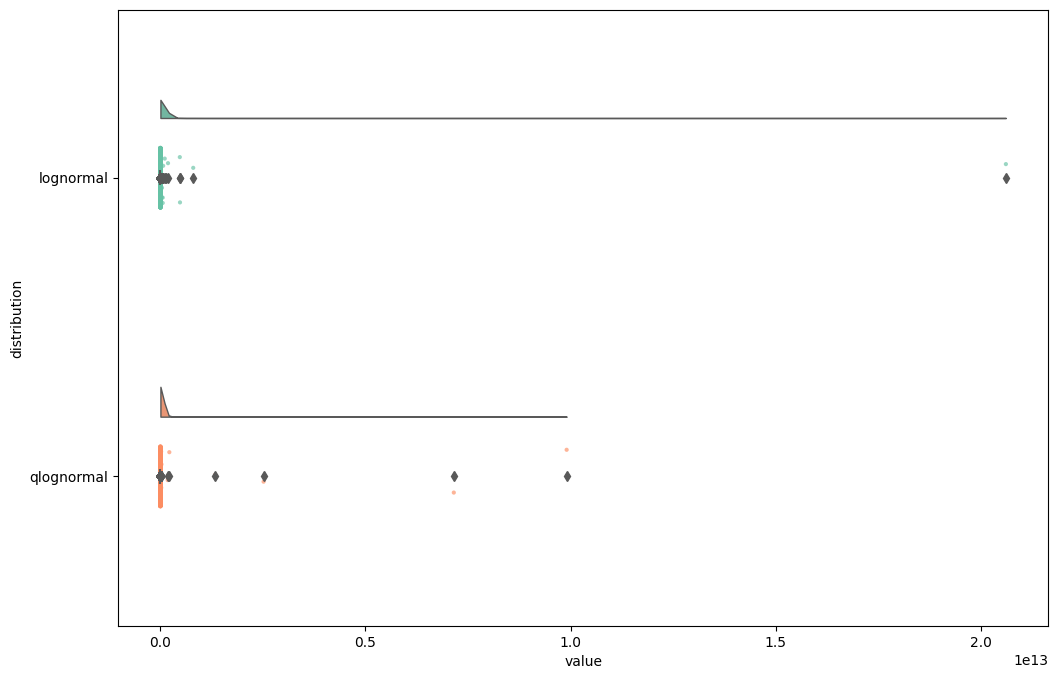

In [12]:
f, ax = plt.subplots(figsize=(12, 8))
pt.RainCloud(
    data=df_lognormal,
    y="value",
    x="distribution",
    orient="h",
    width_viol=0.2,
    width_box=0.05,
    rain_alpha=0.66,
    rain_edgecolor="grey",
    ax=ax,
)

<Axes: xlabel='value', ylabel='distribution'>

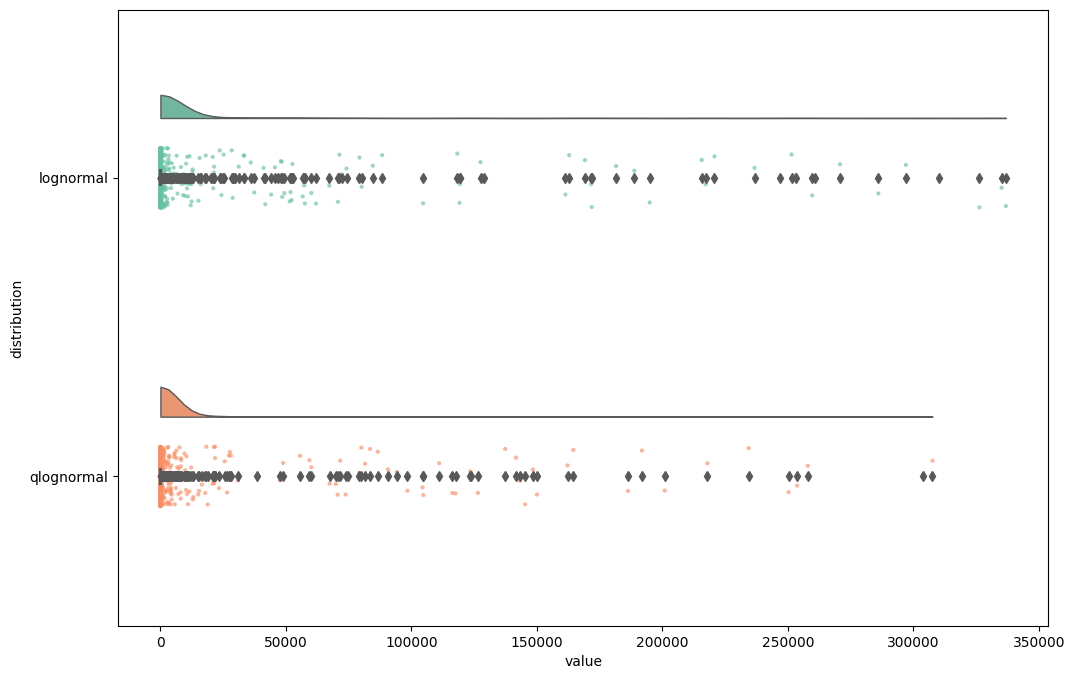

In [13]:
df_lognormal_clipped = df_lognormal.loc[
    df_lognormal["value"] < df_lognormal["value"].quantile(0.90), :
]

f, ax = plt.subplots(figsize=(12, 8))
pt.RainCloud(
    data=df_lognormal_clipped,
    y="value",
    x="distribution",
    orient="h",
    width_viol=0.2,
    width_box=0.05,
    rain_alpha=0.66,
    rain_edgecolor="grey",
    ax=ax,
)

## animate


In [16]:
uniform_sample_space = pd.DataFrame(
    sample_my_space({"hyper_1": hp.uniform("hyper_1", 0, 10)}), columns=["uniform"]
)


df_uniform = pd.concat([uniform_sample_space], axis=1).melt(var_name="distribution")
df_uniform.sample(6)

,distribution,value
605,uniform,1.212292
373,uniform,7.080661
417,uniform,9.370453
669,uniform,0.696434
309,uniform,1.060334
346,uniform,5.794282


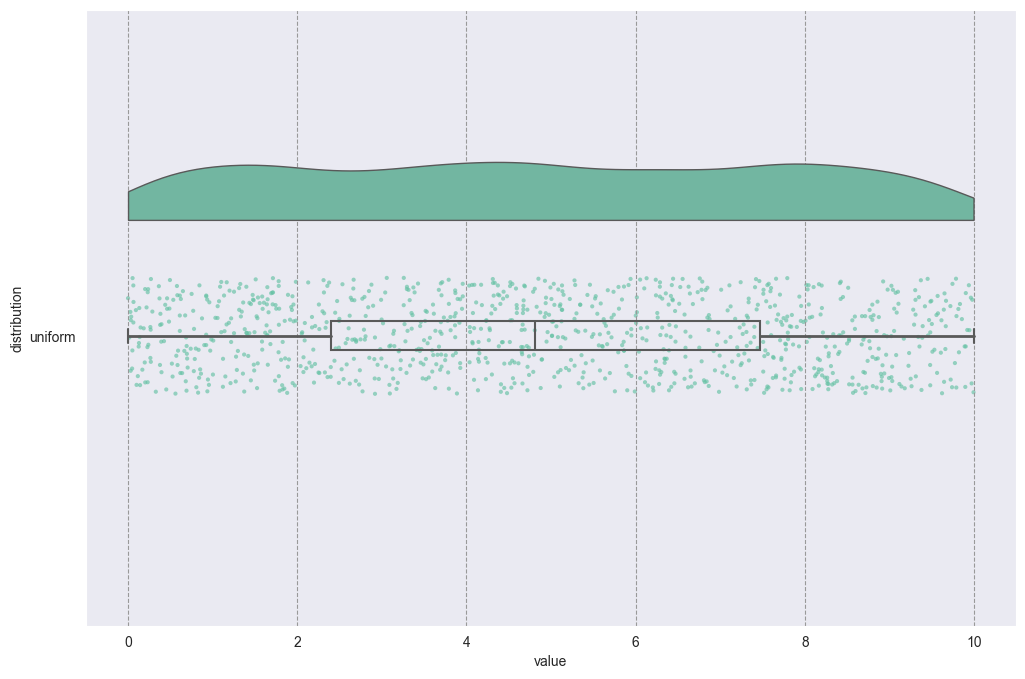

In [25]:
with sns.axes_style("darkgrid", {"grid.color": ".6", "grid.linestyle": "--"}):
    f, ax = plt.subplots(figsize=(12, 8))
    pt.RainCloud(
        data=df_uniform,
        y="value",
        x="distribution",
        orient="h",
        width_viol=0.2,
        width_box=0.05,
        rain_alpha=0.66,
        rain_edgecolor="grey",
        ax=ax,
    )

In [45]:
def plot_frame(data: pd.DataFrame) -> None:
    with sns.axes_style("darkgrid", {"grid.color": ".6", "grid.linestyle": "--"}):
        f, ax = plt.subplots(figsize=(12, 8))
        ax.set_xlim((np.float64(-0.5), np.float64(10.5)))
        ax.set_ylim((np.float64(0.5), np.float64(-0.5625)))
        pt.RainCloud(
            data=data,
            y="value",
            x="distribution",
            orient="h",
            width_viol=0.2,
            width_box=0.05,
            rain_alpha=0.66,
            move=0.2,
            rain_edgecolor="grey",
            ax=ax,
        )

In [186]:
import gif


@gif.frame
def plot_frame(data: pd.DataFrame) -> None:
    with sns.axes_style("darkgrid", {"grid.color": ".6", "grid.linestyle": "--"}):
        np.random.seed(42)
        f, ax = plt.subplots(figsize=(12, 8))
        ax.set_xlim((np.float64(-0.5), np.float64(10.5)))
        ax.set_ylim((np.float64(0.5), np.float64(-0.5625)))
        pt.RainCloud(
            data=data,
            y="value",
            x="distribution",
            orient="h",
            width_viol=0.2,
            width_box=0.05,
            rain_alpha=0.66,
            move=0.2,
            rain_edgecolor="grey",
            ax=ax,
        )


steps = np.linspace(10, df_uniform.shape[0], 10, dtype=int, endpoint=True)

frames = [plot_frame(df_uniform.loc[:step, :]) for step in steps]

In [187]:
gif.save(
    frames,
    "hyperopt.gif",
    duration=5_00,  # ms
)

<Axes: xlabel='value', ylabel='distribution'>

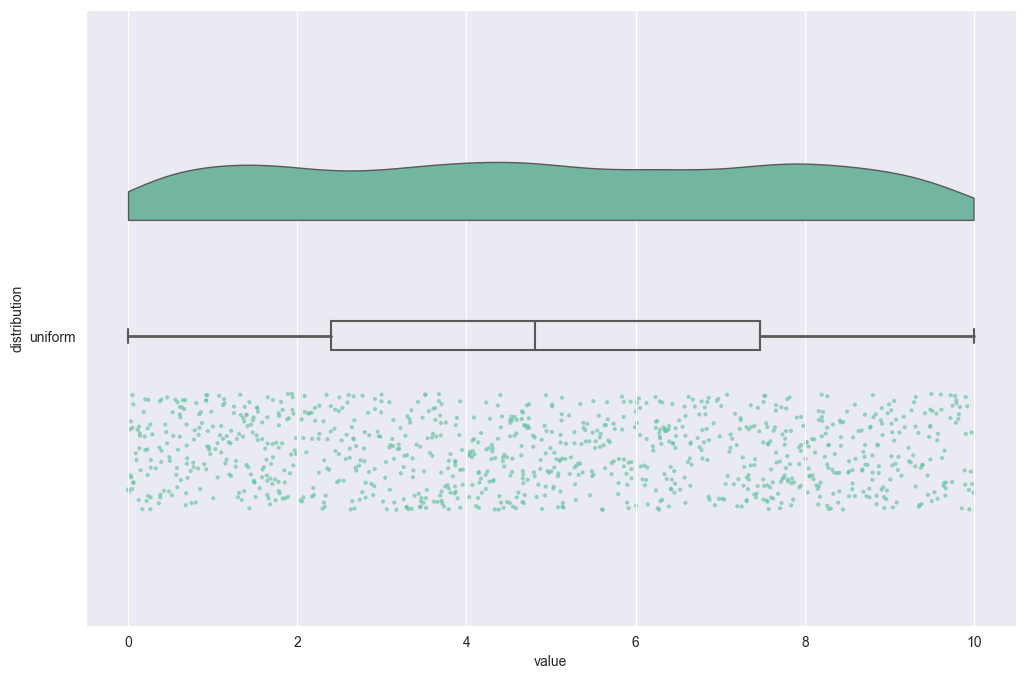

In [185]:
f, ax = plt.subplots(figsize=(12, 8))
pt.RainCloud(
    data=df_uniform,
    y="value",
    x="distribution",
    orient="h",
    width_viol=0.2,
    width_box=0.05,
    rain_alpha=0.66,
    jitter=1,
    move=0.2,
    rain_edgecolor="grey",
    ax=ax,
)